<a href="https://colab.research.google.com/github/Deepak8927/Business-Performance-Reporting/blob/main/Deepak_Internship_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement 3: 📊 Business Performance Analysis & Reporting**

**🔍 Overview:**
You are working as a Junior Data Analyst at a company that tracks sales and customer information. Your manager has shared a dataset containing sales transactions, and you’ve been assigned to analyze it to uncover trends, patterns, and generate summary reports.

Your role is to clean the dataset, analyze key business metrics, generate visualizations, and export reports — using only Pandas, NumPy, Matplotlib, and Seaborn. The goal is to simulate a real-world reporting workflow based on company data.

[LINK OF DATASET](https://drive.google.com/file/d/12F4qf_J-7EB0slpUkM8SUIQosKou4Qu7/view?usp=drive_link)

**📌 Problem Statement:**

Design a Python-based sales analysis dashboard that:

✅ Loads and processes real-world sales data using Pandas and NumPy

✅ Cleans missing values and corrects formatting for consistent analysis

✅ Analyzes key business metrics like:

Most common payment methods

Cities with the highest order counts

Monthly growth in number of orders

✅ Identifies product-level patterns (like overpriced underperformers)

✅ Generates business visualizations using Matplotlib & Seaborn

✅ Exports clean, meaningful reports to share with business teams

**🎯 Project Objectives**

🔹 Step 1: Load & Explore the Dataset

✅ Task:
* Load the CSV file containing sales data
* Display the first few rows to understand structure
* Check for column names, and data types

🔹 Step 2: Data Cleaning & Preprocessing

✅ Task:
* Find missing values in both numerical and categorical columns
* Convert the Date column to datetime format
* Check and confirm updated data types using the appropriate function

🔹 Step 3: Operational Insights

✅ Task:
* Use grouping and counting techniques to extract:
* The most frequently used payment methods
* The cities with the highest number of orders
* The monthly order volume (based on a formatted Year-Month column)

🔹 Step 4: Product Analysis

✅ Task:
* Group by Product Name and calculate average price and quantity sold
* Identify products with high prices but low sales volume
* Analyze category preferences by customer segments using grouping logic

🔹 Step 6: Data Visualization

✅ Task: Create the following 4 visualizations using Matplotlib & Seaborn:

* Vertical Bar Plot – Top 10 Products by Total Revenue
* Line Plot – Monthly Order Volume Over Time
* Horizontal Bar Plot – Top 10 States by Profit
* Bar Plot – Total Profit by Payment Method

🔹 Step 7: Export Business Reports (CSV Format)

✅ Task:
Prepare a summary of:

* Top 10 Products by Revenue
* Monthly Order Volume
* Combine both summaries side-by-side
* Rename the columns clearly
* Export the final combined DataFrame to a CSV file named:

**top_products_and_monthly_orders.csv**

**🧭 Example User Flow**

* ✅ Load and explore the dataset using Pandas
* ✅ Clean and prepare the data
* ✅ Generate insights: payment method usage, city-wise orders, monthly growth
* ✅ Analyze product trends
* ✅ Create five visualizations to represent business metrics
* ✅ Export final business summary reports as .csv

**💡 Menu Options for Learners:**

When the program runs, learners can choose:

* ✅ Load & Explore Sales Data
* ✅ Clean & Preprocess the Data
* ✅ Analyze Payment Method Trends
* ✅ View City-Wise Order Performance
* ✅ Find Premium Products with Low Sales
* ✅ Export Business Reports (CSV)



## **Step by Step Problem**
**Step 1: Load & Explore Sales Data**

Before analyzing the sales data, we need to load it into Python and understand what kind of data we’re working with.

✅ Task:
Open the sales file and bring the data into Python

View a few starting records to get an idea of what’s inside

Check how many rows and columns the dataset has

See what types of data (text, number, date) are present in each column

In [ ]:
# Solution of Step 1 :-->
import pandas as pd
data_df = pd.read_csv("Sales Dataset.csv")
print("Printing few starting rows to get an idea of what's inside the Dataset:")
print(data_df.head().to_string(index=False))

print("\nChecking how many rows and columns are in the dataset, and type of data present in each column:")
data_df.info()

Printing few starting rows to get an idea of what's inside the Dataset:
Order ID  Amount  Profit  Quantity    Category     Sub-Category PaymentMode Order Date  CustomerName    State    City Year-Month
 B-26776    9726    1275         5 Electronics Electronic Games         UPI 2023-06-27 David Padilla  Florida   Miami    2023-06
 B-26776    9726    1275         5 Electronics Electronic Games         UPI 2024-12-27 Connor Morgan Illinois Chicago    2024-12
 B-26776    9726    1275         5 Electronics Electronic Games         UPI 2021-07-25  Robert Stone New York Buffalo    2021-07
 B-26776    4975    1330        14 Electronics         Printers         UPI 2023-06-27 David Padilla  Florida   Miami    2023-06
 B-26776    4975    1330        14 Electronics         Printers         UPI 2024-12-27 Connor Morgan Illinois Chicago    2024-12

Checking how many rows and columns are in the dataset, and type of data present in each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 en

**✅ Step 2: Clean and Preprocess the Data**

Before we can analyze the data, we must make sure it's clean and in the correct format.

✅ Task:
Check if any values are missing from the dataset

Make sure date columns are in the correct format

Confirm that each column has the right type of data (number, text, or date)

In [ ]:
# Solution of Step 2 :-->
print("Checking if there is any missing values present in the dataset:")
print(data_df.isnull().sum())
data_df['Order Date'] = pd.to_datetime(data_df['Order Date'])
print("\nChecking if the each column is in corret format or not:")
print(data_df.dtypes)

Checking if there is any missing values present in the dataset:
Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
Order Date      0
CustomerName    0
State           0
City            0
Year-Month      0
dtype: int64

Checking if the each column is in corret format or not:
Order ID                object
Amount                   int64
Profit                   int64
Quantity                 int64
Category                object
Sub-Category            object
PaymentMode             object
Order Date      datetime64[ns]
CustomerName            object
State                   object
City                    object
Year-Month              object
dtype: object


**✅ Step 3: Generate Operational Insights**

Now that the data is clean, we can start using SQL to extract meaningful business insights.

* Find out which payment methods are most frequently used by customers
* Identify the top 10 cities with the highest number of orders

In [ ]:
# Solution of Step 3: Part 1 :-->
import sqlite3
conn = sqlite3.connect('Sales_Dataset.db')
data_df.to_sql('Sales_Data', conn, index=False, if_exists='replace')
cursor = conn.cursor()

query = """
  SELECT PaymentMode, COUNT(*) AS PaymentCounts
  FROM Sales_data
  GROUP BY PaymentMode
  ORDER BY PaymentCounts DESC;
"""
print("No. of times each Payment Mode is used:\n")
df = pd.read_sql(query, conn)
print(df.to_string(index=False))

No. of times each Payment Mode is used:

PaymentMode  PaymentCounts
 Debit Card            260
Credit Card            258
        UPI            252
        EMI            218
        COD            206


In [ ]:
# Solution of Step 3: Part 2 :-->
query = """
  SELECT City, COUNT(*) AS OrderCounts
  FROM Sales_data
  GROUP BY City
  ORDER BY OrderCounts DESC;
"""
print("Top 10 Most No. of orders by each City:\n")
df = pd.read_sql(query, conn)
print(df.head(10).to_string(index=False))

Top 10 Most No. of orders by each City:

         City  OrderCounts
      Buffalo           90
San Francisco           84
      Orlando           77
    Rochester           74
    San Diego           73
       Dallas           72
    Cleveland           70
  Springfield           68
        Miami           66
       Austin           65


**✅ Step 4: Product Analysis**

* Products that are expensive but sold in small quantities (maybe overpriced or not promoted well)
* Categories that are most popular (so they know what’s in demand)

In [ ]:
# Solution of Step 4: Part 1 :-->
query = """
  SELECT `Sub-Category`, ROUND(AVG(Amount),2) AS Amount, SUM(Quantity) AS Quantity
  FROM Sales_data
  GROUP BY `Sub-Category`
  ORDER BY Amount DESC, Quantity ASC;
"""
print("Products that are expensive but sold in small quantities:\n")
df = pd.read_sql(query, conn)
print(df.to_string(index=False))

Products that are expensive but sold in small quantities:

    Sub-Category  Amount  Quantity
        Printers 5961.67      1124
         Markers 5707.95      1173
Electronic Games 5433.58      1220
         Binders 5417.06       688
          Chairs 5204.39       875
          Tables 5124.40      1303
           Paper 5045.72       981
           Sofas 4985.68      1233
          Phones 4980.74       980
            Pens 4844.46      1204
         Laptops 4772.16       934
       Bookcases 4695.06      1030


In [ ]:
# Solution of Step 4: Part 2 :-->
query = """
  SELECT Category, SUM(Quantity) AS Quantity
  FROM Sales_data
  GROUP BY Category
  ORDER BY Quantity DESC;
"""
print("Most Popular Categories:\n")
df = pd.read_sql(query, conn)
print(df.to_string(index=False))

conn.commit()
conn.close()

Most Popular Categories:

       Category  Quantity
      Furniture      4441
    Electronics      4258
Office Supplies      4046


**✅ Step 5: Data Visualization**

**📊 Plot 1: Top 10 Products by Revenue**

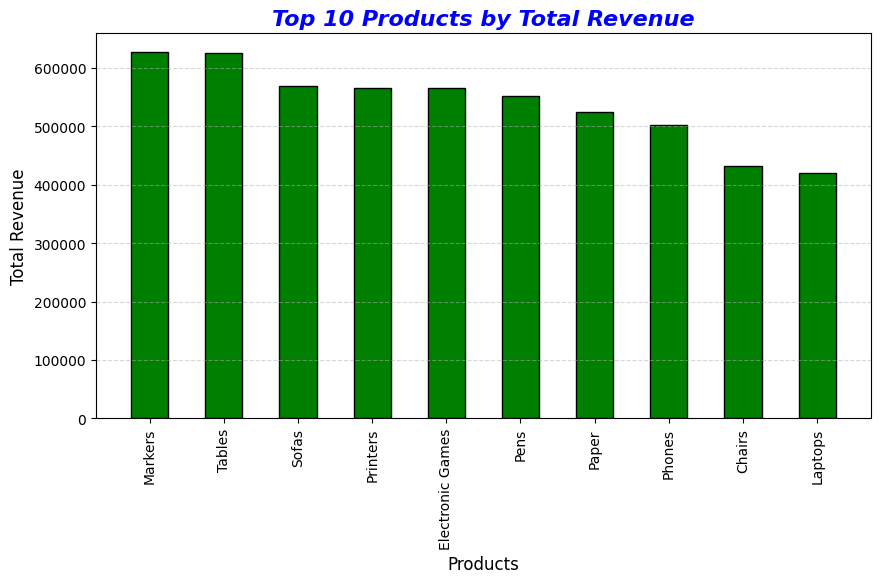

In [ ]:
# Solution of Step 5: Part 1 :-->
products_totalRevenue_df = data_df.groupby('Sub-Category')['Amount'].sum().reset_index(name="Amount").sort_values(by="Amount", ascending=False)

products = products_totalRevenue_df['Sub-Category'].head(10)
total_amount = products_totalRevenue_df['Amount'].head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.bar(products ,total_amount, color = "Green", width = 0.5, edgecolor = "black")

plt.title("Top 10 Products by Total Revenue", fontsize= 16, fontweight = "bold", color = "blue", fontstyle = "italic")
plt.xlabel("Products", fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel("Total Revenue", fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.show()

**📉 Plot 2: Monthly Order Trend**

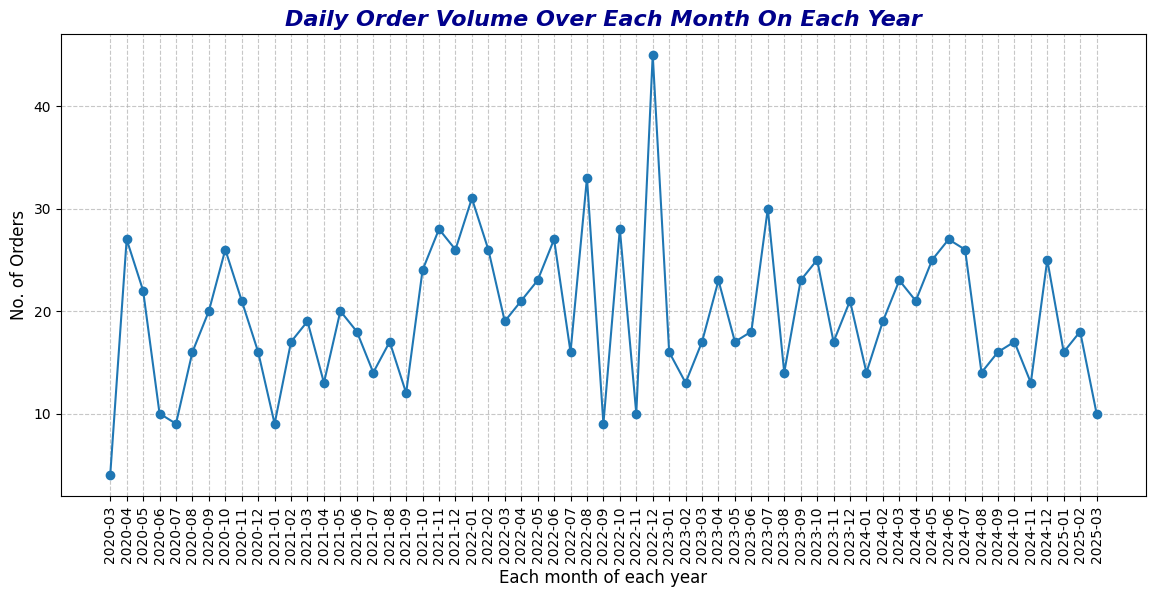

In [ ]:
# Solution of Step 5: Part 2 :-->
monthOrder_counts_df = data_df['Year-Month'].value_counts().reset_index().sort_values(by='Year-Month', ascending=True)
monthOrder_counts_df.columns = ['Year-Month', 'Order Counts']

yearMonth = monthOrder_counts_df['Year-Month']
orderCount = monthOrder_counts_df['Order Counts']

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
plt.plot(yearMonth, orderCount, marker='o')
plt.title("Daily Order Volume Over Each Month On Each Year", fontsize= 16, fontweight = "bold", color = "darkblue", fontstyle = "italic")
plt.xlabel("Each month of each year", fontsize= 12)
plt.xticks(rotation=90)
plt.ylabel("No. of Orders", fontsize= 12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

**✅ Plot 3: Top 10 States by Total Profit**

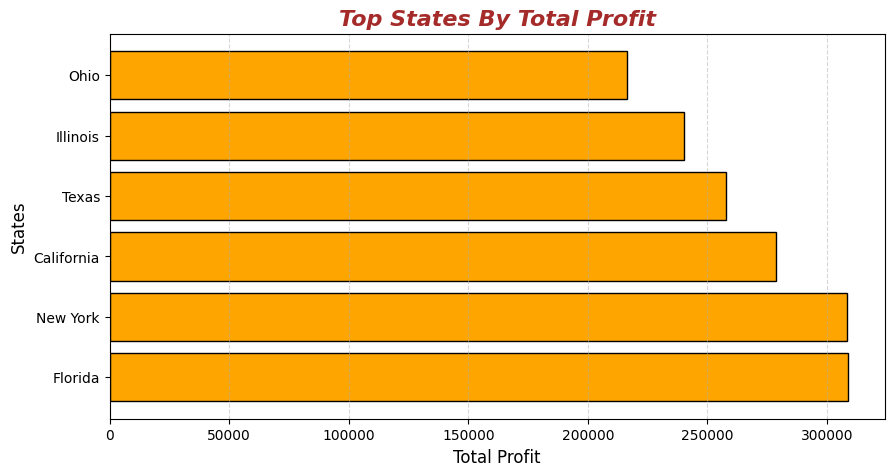

In [ ]:
# Solution of Step 5: Part 3 :-->
states_totalProfit_df = data_df.groupby('State')['Profit'].sum().reset_index(name='Total Profit').sort_values(by='Total Profit', ascending=False)

states = states_totalProfit_df['State']
totalProfit = states_totalProfit_df['Total Profit'].head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.barh(states ,totalProfit, color = "orange", edgecolor = "black")

plt.title("Top States By Total Profit", fontsize= 16, fontweight = "bold", color = "brown", fontstyle = "italic")
plt.xlabel("Total Profit", fontsize = 12)
plt.ylabel("States", fontsize = 12)
plt.grid(axis = "x", linestyle = "--", alpha = 0.5)
plt.show()

**✅ Plot 4: Total Profit by Payment Mode**

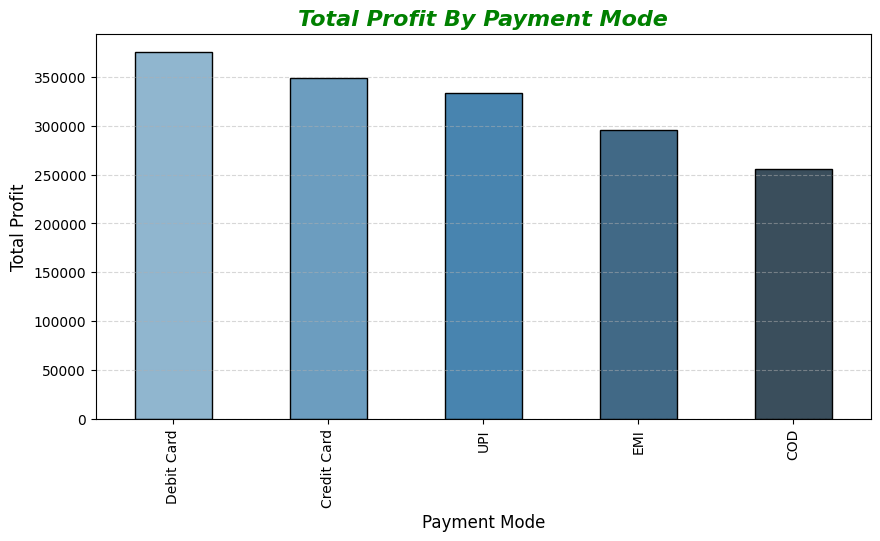

In [ ]:
# Solution of Step 5: Part 4 :-->
payment_totalProfit_df = data_df.groupby('PaymentMode')['Profit'].sum().reset_index(name='Total Profit').sort_values(by='Total Profit', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
sns.barplot(x='PaymentMode', y='Total Profit', data=payment_totalProfit_df, hue='PaymentMode', palette='Blues_d', width = 0.5, edgecolor = "black")

plt.title("Total Profit By Payment Mode", fontsize= 16, fontweight = "bold", color = "Green", fontstyle = "italic")
plt.xlabel("Payment Mode", fontsize = 12)
plt.xticks(rotation=90)
plt.ylabel("Total Profit", fontsize = 12)
plt.grid(axis = "y", linestyle = "--", alpha = 0.5)
plt.show()

**✅ Step 7: Export Business Reports**

✅ Task:
In this final step, you will create and export a summary report that combines two different business insights:

**🔹 1. Top 10 Products by Revenue**
* Group the data by both Category and Sub-Category.
* Calculate the total revenue using the Amount column.
* Sort the results in descending order of revenue.
* Select the top 10 entries.
* Reset the index to make the grouped values into columns.
* Rename the columns to clearly reflect:
["Top Product Category", "Sub-Category", "Total Revenue"].

**🔹 2. Monthly Order Volume**
* Use the Year-Month column to count the number of orders per month.
* Sort the months in chronological order.
* Convert the result into a DataFrame using .reset_index().
* Rename the columns as:
["Month", "Number of Orders"].

Take only the first 10 months to match the number of rows from the Top Products table.

**🔹 3. Combine and Export**
* Use pd.concat(..., axis=1) to join both tables side by side.
* Export the final combined DataFrame to a CSV file named: "top_products_and_monthly_orders.csv" using .to_csv().

In [ ]:
# Solution of Step 7: Part 1 :-->
sorted_grouped_df = data_df.groupby(['Category', 'Sub-Category'])['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)
sorted_grouped_df.columns = ["Top Product Category","Sub-Category","Total Revenue"]

In [ ]:
# Solution of Step 7: Part 2 :-->
monthOrder_counts_df = data_df['Year-Month'].value_counts().reset_index().sort_values(by='Year-Month', ascending=True)
monthOrder_counts_df.columns = ['Year-Month', 'Order Counts']

In [ ]:
# Solution of Step 7: Part 3 :-->
combined_df = pd.concat([sorted_grouped_df, monthOrder_counts_df], axis=1)
combined_df.to_csv("top_products_and_monthly_orders.csv", index=False)